In [1]:
import numpy as np
import pandas as pd
import datamol as dm

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/potency.csv", index_col=0)
df.head()

,CXSMILES,Set,pIC50 (MERS-CoV Mpro),pIC50 (SARS-CoV-2 Mpro)
0,COC[C@]1(C)C(=O)N(C2=CN=CC3=CC=CC=C23)C(=O)N1C...,Train,4.19,NaN
1,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,Train,4.92,5.29
2,CNC(=O)CN1C[C@]2(C[C@H](C)N(C3=CN=CC=C3C3CC3)C...,Train,4.73,NaN
3,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,Train,4.90,6.11
4,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,Train,4.81,5.62


In [3]:
df = df.reset_index(drop=True)
train_indices = df.index[df["Set"] == "Train"].tolist()
test_indices = df.index[df["Set"] == "Test"].tolist()

In [4]:
mols = np.array([dm.to_mol(smi) for smi in df["CXSMILES"]])

In [5]:
mat = dm.cdist(mols[test_indices], mols[train_indices])
mat.shape

(292, 1031)

In [6]:
# k=1
knn_distance = np.nanmin(mat, axis=1)
knn_distance.shape

(292,)

Text(0.5, 1.0, 'Distance between the train and test set for the Potency challenge')

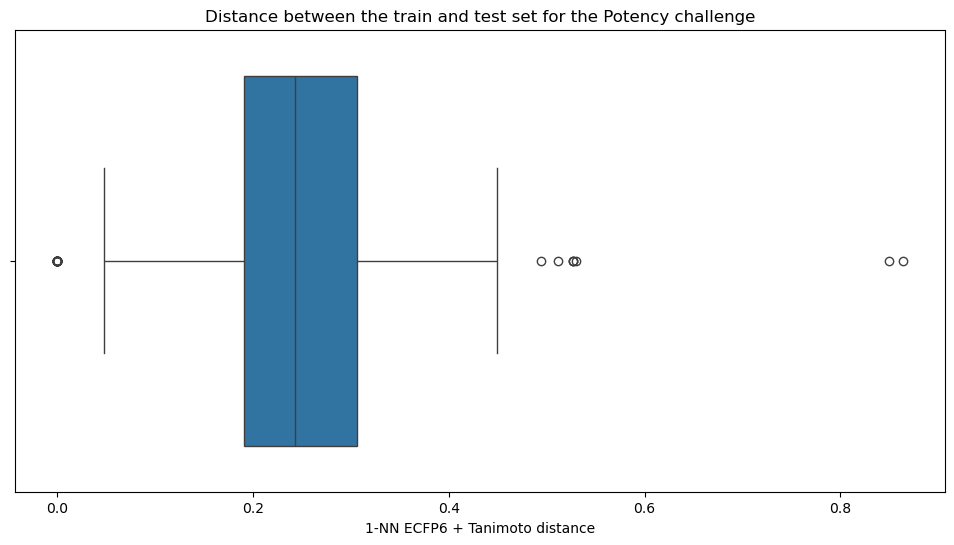

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x=knn_distance, ax=ax)
ax.set_xlabel("1-NN ECFP6 + Tanimoto distance")
ax.set_title("Distance between the train and test set for the Potency challenge")

Text(0.5, 1.0, 'Distance between the train and test set for the Potency challenge')

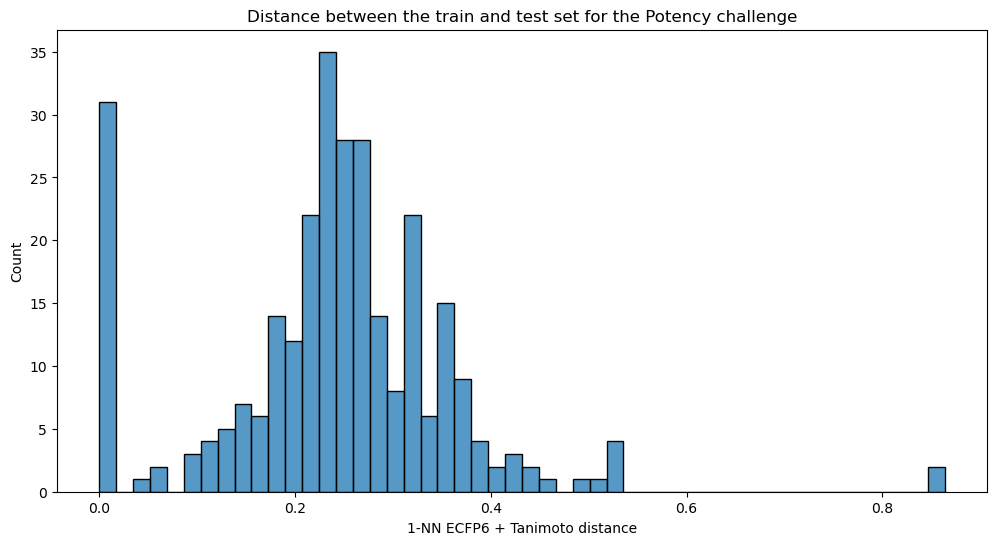

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.histplot(knn_distance, bins=50)
ax.set_xlabel("1-NN ECFP6 + Tanimoto distance")
ax.set_title("Distance between the train and test set for the Potency challenge")

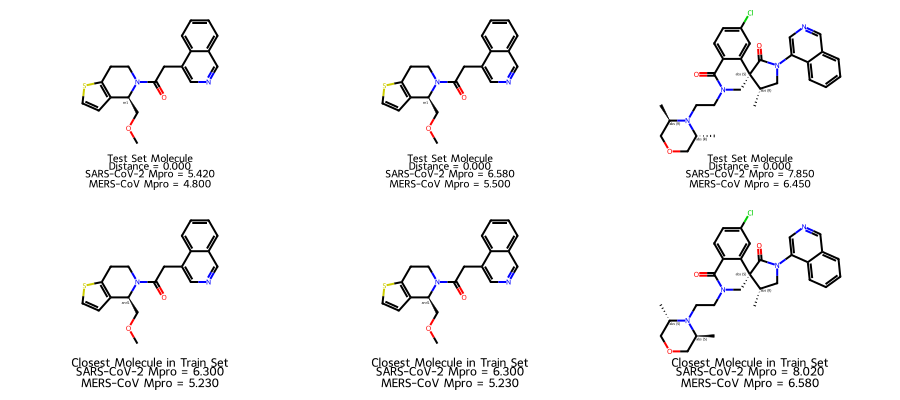

In [77]:
ind_pairs_test = np.argpartition(knn_distance, 3)[:3]
ind_pairs_train = [np.nanargmin(mat[idx]) for idx in ind_pairs_test]

pairs = []
anns = []

for idx in ind_pairs_test:
    
    mol = mols[test_indices][idx]

    ann = ["Test Set Molecule", f"Distance = {knn_distance[idx]:.3f}"]
    for tgt in ["SARS-CoV-2 Mpro", "MERS-CoV Mpro"]:
        ann.append(f"{tgt} = {df.at[test_indices[idx], f"pIC50 ({tgt})"]:.3f}")
    ann = "\n".join(ann)
    
    pairs.append(mol)
    anns.append(ann)

for idx in ind_pairs_train:
    
    mol = mols[train_indices][idx]

    ann = ["Closest Molecule in Train Set"]
    for tgt in ["SARS-CoV-2 Mpro", "MERS-CoV Mpro"]:
        ann.append(f"{tgt} = {df.at[train_indices[idx], f"pIC50 ({tgt})"]:.3f}")
    ann = "\n".join(ann)
    
    pairs.append(mol)
    anns.append(ann)


dm.to_image(pairs, anns, mol_size=(300, 200), n_cols=3, align=True, use_svg=True, legendFraction=0.2, legendFontSize=12)

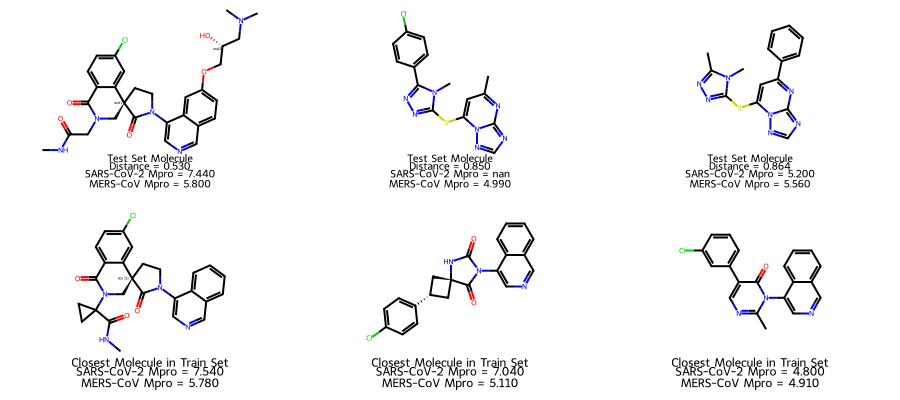

In [76]:
ind_pairs_test = np.argpartition(knn_distance, len(knn_distance) - 3)[-3:]
ind_pairs_train = [np.nanargmin(mat[idx]) for idx in ind_pairs_test]

pairs = []
anns = []

for idx in ind_pairs_test:
    
    mol = mols[test_indices][idx]

    ann = ["Test Set Molecule", f"Distance = {knn_distance[idx]:.3f}"]
    for tgt in ["SARS-CoV-2 Mpro", "MERS-CoV Mpro"]:
        ann.append(f"{tgt} = {df.at[test_indices[idx], f"pIC50 ({tgt})"]:.3f}")
    ann = "\n".join(ann)
    
    pairs.append(mol)
    anns.append(ann)

for idx in ind_pairs_train:
    
    mol = mols[train_indices][idx]

    ann = ["Closest Molecule in Train Set"]
    for tgt in ["SARS-CoV-2 Mpro", "MERS-CoV Mpro"]:
        ann.append(f"{tgt} = {df.at[train_indices[idx], f"pIC50 ({tgt})"]:.3f}")
    ann = "\n".join(ann)
    
    pairs.append(mol)
    anns.append(ann)


dm.to_image(pairs, anns, mol_size=(300, 200), n_cols=3, align=True, use_svg=True, legendFraction=0.2, legendFontSize=12)